# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key and set units
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set base url to make requests
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city list and count to confirm sufficient count and proper syntax
len(cities)

602

### Perform API Calls

In [3]:
#Creating all of the lists which will be appeneded in the following for loop
cityName = []
cloudiness = []
date = []
humidity = []
lats = []
lngs = []
maxTemp = []
windSpeed = []
country = []

#Creating 2 counter variables to keep track of the number in each set being printed
counter = 0
set_counter = 1

# Print statement header 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#for loop with try and except statement to prevent the compile from erroring and stopping due to lacking info on a city
for city in cities:
    try:
        #Requesting info from the url and appending all of our lists with this info
        response = requests.get(url + city.replace(" ","&")).json()
        cityName.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        windSpeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        #logic to count through the sets and numbers in each set, resetting at 49 in each set
        if counter > 48:
            counter = 1
            set_counter += 1
        else:
            counter += 1
            
        print(f"Processing Record {counter} of Set {set_counter} | {city}")

    #If there is an error due to missing info, print this statement
    except: 
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kortkeros
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | samana
Processing Record 8 of Set 1 | ostrovnoy
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | albany
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | naze
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | brae
Processing Record 17 of Set 1 | okato
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | pergamino
Processing Record 22 of Set 1 | omsukchan
Processing Record 23 of Set 1 | 

Processing Record 36 of Set 4 | taquaritinga
Processing Record 37 of Set 4 | mys shmidta
Processing Record 38 of Set 4 | wahpeton
Processing Record 39 of Set 4 | rocha
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | husavik
Processing Record 42 of Set 4 | ambilobe
Processing Record 43 of Set 4 | manakara
Processing Record 44 of Set 4 | nagato
Processing Record 45 of Set 4 | qaanaaq
Processing Record 46 of Set 4 | bara
Processing Record 47 of Set 4 | moose factory
Processing Record 48 of Set 4 | vardo
Processing Record 49 of Set 4 | kintinku
Processing Record 1 of Set 5 | pacific grove
Processing Record 2 of Set 5 | dubbo
Processing Record 3 of Set 5 | broome
Processing Record 4 of Set 5 | mookane
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | hambantota
City not found. Skipping...
Processing Record 7 of Set 5 | mamakan
Processing Record 8 of Set 5 | beaumont
City not found. Skipping...
Processing Record 9 of Set 5 | roma
Processing Reco

Processing Record 30 of Set 8 | souillac
Processing Record 31 of Set 8 | niquelandia
Processing Record 32 of Set 8 | muros
Processing Record 33 of Set 8 | zelenoborsk
Processing Record 34 of Set 8 | ribeira grande
Processing Record 35 of Set 8 | itarema
Processing Record 36 of Set 8 | papenburg
City not found. Skipping...
Processing Record 37 of Set 8 | skibbereen
Processing Record 38 of Set 8 | nacala
City not found. Skipping...
City not found. Skipping...
Processing Record 39 of Set 8 | beringovskiy
Processing Record 40 of Set 8 | baker city
Processing Record 41 of Set 8 | roald
Processing Record 42 of Set 8 | lufilufi
Processing Record 43 of Set 8 | arman
Processing Record 44 of Set 8 | sortland
Processing Record 45 of Set 8 | yumen
Processing Record 46 of Set 8 | kalianget
Processing Record 47 of Set 8 | akyab
Processing Record 48 of Set 8 | simpang
Processing Record 49 of Set 8 | carutapera
Processing Record 1 of Set 9 | mahon
Processing Record 2 of Set 9 | acari
Processing Record

In [4]:
#Creating the list of dictionaries whihc will be converted into a dataframe
weather_dict = {
    "City": cityName,
    "Cloudiness": cloudiness ,
    "Country": country ,
    "Date": date,
    "Humidity": humidity ,
    "Lat.": lats,
    "Lng.": lngs, 
    "Max Temp": maxTemp ,
    "Wind Speed": windSpeed
}

#Creating the dataframe to convert all of the data into a csv file
weather_df = pd.DataFrame(weather_dict)

#Showing the count of all values in the dataframe
weather_df.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat.          541
Lng.          541
Max Temp      541
Wind Speed    541
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat.,Lng.,Max Temp,Wind Speed
0,Mar,75,ES,1579743830,100,43.40,-4.01,46.00,1.12
1,Mataura,43,NZ,1579744094,75,-46.19,168.86,64.99,13.00
2,Rikitea,12,PF,1579743889,75,-23.12,-134.97,79.61,12.46
3,Kortkeros,90,RU,1579744533,85,61.81,51.58,23.00,8.95
4,Iqaluit,40,CA,1579744121,68,63.75,-68.51,-20.00,2.24


### Plotting the Data

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

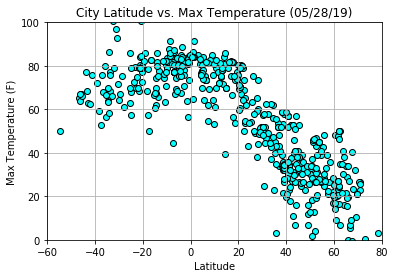

In [8]:
plt.scatter(lats, maxTemp, edgecolors="black", facecolors="aqua")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.grid(True)
plt.axis([-60, 80, 0, 100])
plt.savefig("Figures/fig1.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

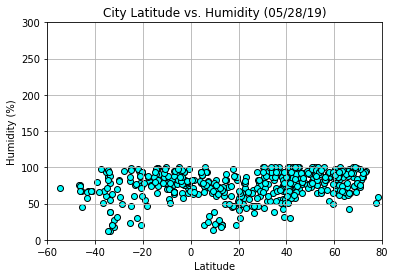

In [9]:
plt.scatter(lats, humidity, edgecolors="black", facecolors="aqua")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.grid(True)
plt.axis([-60, 80, 0, 300])
plt.savefig("Figures/fig2.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

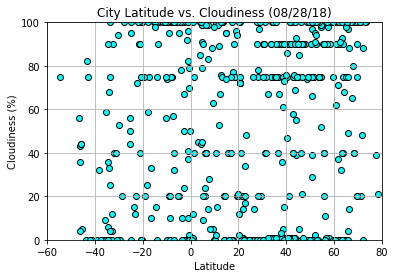

In [10]:
plt.scatter(lats, cloudiness, edgecolors="black", facecolors="aqua")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (08/28/18)")
plt.grid(True)
plt.axis([-60, 80, 0, 100])
plt.savefig("Figures/fig3.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

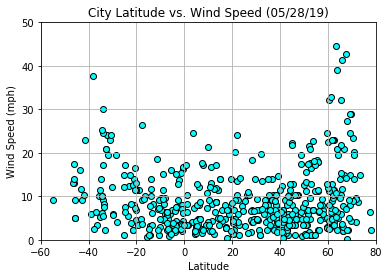

In [11]:
plt.scatter(lats, windSpeed, edgecolors="black", facecolors="aqua")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.grid(True)
plt.axis([-60, 80, 0, 50])
plt.savefig("Figures/fig4.png")
plt.show

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#northern hemispehere lat < 0 ; southern < 0

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression